In [1]:
from database.api.supabase import get_db_instance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[{'id': '0f311d29-f6d3-4977-a456-8c5e8ef59709',
  'name': 'בצל סגול',
  'price': 6.9,
  'unit': '1000 גרם',
  'created_at': '2025-01-07T12:16:09.693929+00:00',
  'updated_at': '2025-01-07T12:16:09.693929+00:00',
  'description': 'בצל סגול טרי',
  'stock_quantity': 100,
  'image_url': ''},
 {'id': '5d56c8e7-3fee-4066-a426-6fed9ef49b9f',
  'name': 'תפוחי אדמה',
  'price': 5.9,
  'unit': '1000 גרם',
  'created_at': '2024-12-31T11:04:45.725449+00:00',
  'updated_at': '2024-12-31T11:04:45.725449+00:00',
  'description': 'תפוחי אדמה לבנים',
  'stock_quantity': 139,
  'image_url': ''},
 {'id': '752b5608-d177-4218-a3cf-2de087cef80e',
  'name': 'אורז',
  'price': 12.9,
  'unit': '1000 גרם',
  'created_at': '2024-12-31T11:04:45.725449+00:00',
  'updated_at': '2024-12-31T11:04:45.725449+00:00',
  'description': 'אורז לבן ארוך',
  'stock_quantity': 145,
  'image_url': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwU4T42Waf2tLZu6r4VNgiui1j9lJmdEk_QA&s'},
 {'id': 'abf2efb7-369c-401c-b95f-8
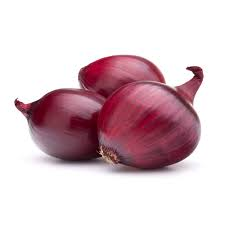
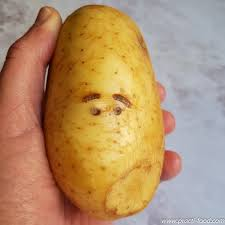
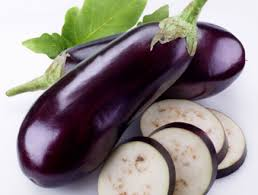

In [2]:
get_db_instance().table('products').select('*').execute().data[:5]

## Adding extra data from shufersal api

In [9]:
import xml.etree.ElementTree as ET
import json

In [29]:
def extract_items_from_xml(xml_file_path):
    """
    Extracts specific fields from an XML file and converts each item to a JSON object.

    Args:
        xml_file_path (str): Path to the XML file.

    Returns:
        list: A list of JSON strings, each representing an item.
    """
    # Parse the XML file
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    # Define the fields to extract
    fields = [
        "ItemName",
        "ItemPrice",
        "UnitQty",
        "ManufacturerItemDescription",
        "Quantity",
        "UnitOfMeasure",
    ]

    # Extract items
    items = []
    for item in root.findall("./Items/Item"):
        item_values = [item.find(field).text if item.find(field) is not None else None for field in fields]
        items.append(item_values)

    return items

In [30]:
file_path = './assets/Price7290027600007-002-202412251600'
extracted_items = extract_items_from_xml(file_path)

In [31]:
for item in extracted_items:
    print(item)
    print('\n')

["ליקר סאות'רן קומפורט700מ", '109.90', 'מיליליטרים', "ליקר סאות'רן", '700.00', '100 מ"ל']


['קראנצי שיבולת ושוקולד5יח', '22.90', 'גרמים', "חטיף נייצ'ר ואלי", '210.00', '100 גרם']


['חמצוצים בטעם קולה 100גרם', '12.90', 'גרמים', 'חמצוצים בטעם קולה 100גרם', '100.00', '100 גרם']


['קוקו מדמוזל שנל 100א אדפ', '770.00', 'מיליליטרים', 'קוקו מדמוזל שאנל', '100.00', '100 מ"ל']


['Poeme אדפ ספריי אשה100מל', '449.00', 'מיליליטרים', 'Poeme אדפ ספריי', '100.00', '100 מ"ל']


['ז\'אדור אדפ לאשה 100 מ"ל', '659.00', 'מיליליטרים', "בושם ז'אדור", '100.00', '100 מ"ל']


['MILLION 1 א.ד.ט לגבר100מ', '299.00', 'מיליליטרים', '1 MILLION א.ד.ט לגבר100מ', '100.00', '100 מ"ל']


['ROCHAS א.ד.ט לגבר', '245.00', 'מיליליטרים', 'ROCHAS א.ד.ט', '100.00', '100 מ"ל']


["סקלפצ'ר א.ד.ט לגבר100מל", '99.00', 'מיליליטרים', 'SCULPTURE א.ד.ט', '100.00', '100 מ"ל']


['Her For א.ד.ט לאישה100מל', '499.00', 'מיליליטרים', 'נרסיסו א.ד.ט אשה', '100.00', '100 מ"ל']


['PUDREE NARCISO א.ד.פ אשה', '559.00', 'מיליליטרים', 'PUDREE

## Create Shufersal items DataFrame 

In [33]:
df = pd.DataFrame(data=extracted_items ,columns=['name','price','unit','description','stock_quantity','unit_Of_Measure'])
df  

,name,price,unit,description,stock_quantity,unit_Of_Measure
0,ליקר סאות'רן קומפורט700מ,109.90,מיליליטרים,ליקר סאות'רן,700.00,"100 מ""ל"
1,קראנצי שיבולת ושוקולד5יח,22.90,גרמים,חטיף נייצ'ר ואלי,210.00,100 גרם
2,חמצוצים בטעם קולה 100גרם,12.90,גרמים,חמצוצים בטעם קולה 100גרם,100.00,100 גרם
3,קוקו מדמוזל שנל 100א אדפ,770.00,מיליליטרים,קוקו מדמוזל שאנל,100.00,"100 מ""ל"
4,Poeme אדפ ספריי אשה100מל,449.00,מיליליטרים,Poeme אדפ ספריי,100.00,"100 מ""ל"
...,...,...,...,...,...,...
599,ברף בניחוח ויטלטי 3 * 50,21.90,גרמים,ברף לאסלה 3 יח,150.00,100 גרם
600,פרסיל קאפס יוניברסל44יח,54.90,יחידה,פרסיל קאפס ג'ל,1.00,יחידה
601,היידרה סקין גל מיסלר150מ,40.90,מיליליטרים,היידרה סקין אפקט,150.00,"100 מ""ל"
602,חטיף רולים קוקוס 140 גרם,20.90,גרמים,חטיף רולים קוקוס,140.00,100 גרם


## EDA 

In [37]:
# cleaning our data to procces for push to database
unit_dict ={
    'מ"ל': 'מיליליטרים',
    'גרם' :'גרמים',
    'ק"ג':'קילוגרמים',
    'ליטר':'ליטר',
    'מטר':'מטרים'
}


unit
מיליליטרים    211
גרמים         209
יחידה         119
קילוגרמים      44
ליטרים         20
מטרים           1
Name: count, dtype: int64